## Data Exploration with Spark

---

### Import Libraries

In [1]:
# import libraries
import findspark

# Locate the spark installation
findspark.init()

import pyspark as ps
from pyspark.sql.functions import col, sum

In [28]:
import pandas as pd

### Initialize Spark

In [2]:
# Initialize a SparkContext
sc = ps.SparkContext(appName="prior_analysis")

23/08/31 10:14:20 WARN Utils: Your hostname, MacBook-Pro-di-Andrea.local resolves to a loopback address: 127.0.0.1; using 192.168.1.129 instead (on interface en0)
23/08/31 10:14:20 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/08/31 10:14:21 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### Connect and import data from HDFS directly into a Spark DataFrame

In [3]:
# Initialize the Session
spark_session = ps.sql.SparkSession(sc)

# Load the data
df_data = spark_session.read.csv('hdfs://localhost:9900/user/andreaalberti/book_reviews/books_data.csv', header=True, inferSchema=True)
df_ratings = spark_session.read.csv('hdfs://localhost:9900/user/andreaalberti/book_reviews/books_rating.csv', header=True, inferSchema=True)

### Data Exploration

- Show the first 5 rows of the data
- Investigate the inferred schema of the data
- Discover data dimensionality
- Show some statistics
- Discover null values
- Discover the number of distinct values in each column

In [14]:
# Show the data
print('Data Table: \n')
df_data.show(5)

print('Ratings Table: \n')
df_ratings.show(5)

Data Table: 

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------+--------------------+--------------------+------------+
|               Title|         description|             authors|               image|         previewLink|           publisher| publishedDate|            infoLink|          categories|ratingsCount|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------+--------------------+--------------------+------------+
|Its Only Art If I...|                null|    ['Julie Strain']|http://books.goog...|http://books.goog...|                null|          1996|http://books.goog...|['Comics & Graphi...|        null|
|Dr. Seuss: Americ...|"Philip Nel takes...| like that of Lew...| has changed lang...| giving us new wo...| inspiring artist...|['Philip Nel']|http://books.goog...|http://books.goog...|   A&C Bla

In [13]:
#Investigate the schema
print('Data Table Schema: \n')
df_data.printSchema()

print('Ratings Table Schema: \n')
df_ratings.printSchema()

Data Table Schema: 

root
 |-- Title: string (nullable = true)
 |-- description: string (nullable = true)
 |-- authors: string (nullable = true)
 |-- image: string (nullable = true)
 |-- previewLink: string (nullable = true)
 |-- publisher: string (nullable = true)
 |-- publishedDate: string (nullable = true)
 |-- infoLink: string (nullable = true)
 |-- categories: string (nullable = true)
 |-- ratingsCount: string (nullable = true)

Ratings Table Schema: 

root
 |-- Id: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- User_id: string (nullable = true)
 |-- profileName: string (nullable = true)
 |-- review/helpfulness: string (nullable = true)
 |-- review/score: string (nullable = true)
 |-- review/time: string (nullable = true)
 |-- review/summary: string (nullable = true)
 |-- review/text: string (nullable = true)



In [18]:
# Check dimensionality
print(f'Data Table Dimensionality: {df_data.count(), len(df_data.columns)}')
print(f'Ratings Table Dimensionality: {df_ratings.count(), len(df_ratings.columns)}')

# Statistical summary
print('Data Table Summary: \n')
df_data.describe().show()

print('Ratings Table Summary: \n')
df_ratings.describe().show()

Data Table Dimensionality: (212404, 10)


Ratings Table Dimensionality: (3000000, 10)
Data Table Summary: 



23/08/30 19:01:47 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
Java HotSpot(TM) 64-Bit Server VM warning: CodeCache is full. Compiler has been disabled.
Java HotSpot(TM) 64-Bit Server VM warning: Try increasing the code cache size using -XX:ReservedCodeCacheSize=


CodeCache: size=131072Kb used=36524Kb max_used=36868Kb free=94548Kb
 bounds [0x00000001081d8000, 0x000000010a628000, 0x00000001101d8000]
 total_blobs=14040 nmethods=13045 adapters=907
 compilation: disabled (not enough contiguous free space left)


+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|summary|               Title|         description|             authors|               image|         previewLink|           publisher|       publishedDate|            infoLink|          categories|        ratingsCount|
+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  count|              212403|              144047|              181153|              161213|              188349|              139274|              186560|              188103|              171880|               63852|
|   mean|   3823.672941176471|  1.4285714285714286|              1578.4|              1184.0|            Infinity|      

+-------+--------------------+--------------------+--------------------+-------------------+-----------+-------------------+------------------+--------------------+--------------------+--------------------+
|summary|                  Id|               Title|               Price|            User_id|profileName| review/helpfulness|      review/score|         review/time|      review/summary|         review/text|
+-------+--------------------+--------------------+--------------------+-------------------+-----------+-------------------+------------------+--------------------+--------------------+--------------------+
|  count|             3000000|             2999792|              482421|            2437750|    2437800|            2999633|           2999870|             2999973|             2999935|             2999957|
|   mean|1.0568515696607149E9|   2012.796651763537|  21.767951161877054|  18.29299003322259|        NaN|3.285048033703448E8| 1656.860421970827|1.1270533345949814E9|        

In [59]:
# Check for number of distinct values for each column
n_distinct_list = []

for c in df_data.columns:
    n_distinct = df_data.select(c).distinct().count()
    n_distinct_list.append(n_distinct)

df_data_pandas = pd.DataFrame({'Column': df_data.columns, 'N. Distinct Values': n_distinct_list})

n_distinct_list = []

for c in df_ratings.columns:
    n_distinct = df_ratings.select(c).distinct().count()
    n_distinct_list.append(n_distinct)

df_ratings_pandas = pd.DataFrame({'Column': df_ratings.columns, 'N. Distinct Values': n_distinct_list})

In [60]:
from pyspark.sql.functions import col, count, when

# Check for missing values
df_data_pandas_tmp = df_data.select([sum(col(c).isNull().cast('int')).alias(c) for c in df_data.columns]).toPandas()
# Add to the pandas summary dataframe
df_data_pandas['N. Missing Values'] = df_data_pandas_tmp.loc[0, :].tolist()

# Check for missing values
df_ratings_pandas_tmp = df_ratings.select([sum(col(c).isNull().cast('int')).alias(c) for c in df_ratings.columns]).toPandas()
# Add to the pandas summary dataframe
df_ratings_pandas['N. Missing Values'] = df_ratings_pandas_tmp.loc[0, :].tolist()

Data Table Missing Values: 

Ratings Table Missing Values: 



<AxesSubplot: title={'center': 'Ratings Table Summary'}, xlabel='Column'>

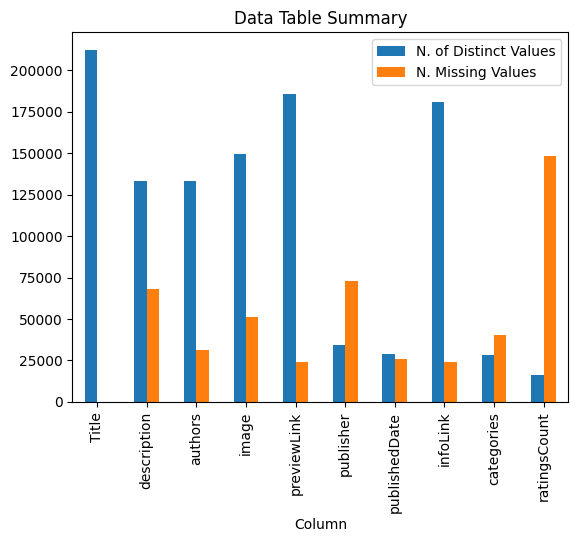

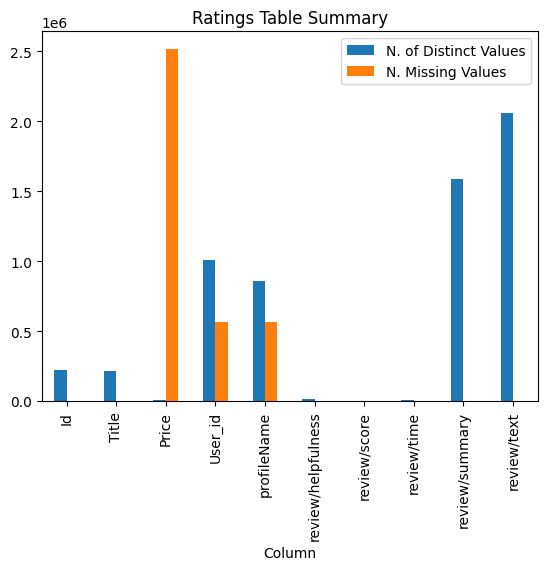

In [100]:
#df_data_pandas.set_index('Column', inplace=True)
df_data_pandas.plot(title='Data Table Summary', kind='bar')

#df_ratings_pandas.set_index('Column', inplace=True)
df_ratings_pandas.plot(title='Ratings Table Summary', kind='bar')

,N. of Distinct Values,N. Missing Values
Column,,
Id,221998,0
Title,212400,208
Price,6191,2517579
User_id,1008435,562250
profileName,854499,562200
review/helpfulness,16533,367
review/score,2038,130
review/time,6831,27
review/summary,1585313,65


23/08/31 11:36:08 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 162749 ms exceeds timeout 120000 ms
23/08/31 11:36:08 WARN SparkContext: Killing executors is not supported by current scheduler.
23/08/31 11:41:30 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.B

In [55]:
# Stop the SparkContext
sc.stop()